### Machine Learning Algorithm:
___

* from **IBM corporation Course by:(Sr.Data Scientist Saeed Aghabozorgi)**
* coding by: **(Ahmad Ahmadi)**
___
### 6) Logistic Regression:

- it's a`supervised`  learning algorithm.
- although Linear Regression is suitable for estimating continuous features, it is not the best tool for predicting the `class`of an observed data. 

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall Linear Regression:</strong></font>
<br>
<br>
as you may remember, <b>linear regression</b> finds a function that relates a continuous dependent variable (y) to some indepedent variables. (i.e. $x_1, x_2$)
$$ y = (\theta_1 \times x_1) + (\theta_2\times x_2) + ... (\theta_n \times x_n) $$
<br>
</div> 
    
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Logistic Regresion:</strong></font>
<br>
<br>
<b> - Logistic Regression</b> is a variation of <u>linear regression</u>, useful when the observed dependent variable (y), is <u>categorical.</u><br>
<b>- Logistic Regression</b> fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function $\sigma()$:
<br> 
<br> $$\sigma({\theta^TX}) =  \frac {e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +...)}}{1 + e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +\cdots)}} $$    
</div>    
    
       
<img src="https://miro.medium.com/max/1200/1*E8c5gbGzT7Rwl8BJUACELg.png">
<caption><center><u><b> Figure 1</u></b>: "Linear Regression Vs Logistic Regression"</caption>    

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>to recap:</strong></font>
<br>
<br>
    so briefly, <b>Logistic Regression</b> passes the input through <u>Logistic / Sigmoid</u> but treats the results as <b>probability:</b>
<hr>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">
<br>
<hr>
</div> 


In [1]:
# importaing packages:

import itertools

# basic packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from scipy:
from scipy import optimize

#from sklearn (scikit learn):
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

%matplotlib inline

### About DataSet:
- We will use a telecommunications dataset for predicting customer churn(leaving customer). This is a historical customer dataset where each row represents one customer.
<p>
<P>
- **the dataset includes information about:**<br>
1) customers who left within the last month -- coulmns is called => churn<br>
2) services that each custmor has signed up for -- phone, multiple lines, internet, online security, and so on.<br>
3) customer account information -- how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges.<br>
4)  Demographic info about customers -- gender, age range, and if they have partners and dependents.

In [2]:
# reading excel data using pd.read():
excel_data = pd.read_excel('telecom_data.xlsx')

In [3]:
# Looking at 10 rows of the above dataset using .head(10):
excel_data.head(10)

,tenure,age,address,income,education,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11,33,7,136,5,5,0,1,1,4.40,...,1,0,1,1,0,1.482,3.033,4.913,4,1
1,33,33,12,33,2,0,0,0,0,9.45,...,0,0,0,0,0,2.246,3.240,3.497,1,1
2,23,30,9,30,1,2,0,0,0,6.30,...,0,0,0,1,0,1.841,3.240,3.401,3,0
3,38,35,5,76,2,10,1,1,1,6.05,...,1,1,1,1,1,1.800,3.807,4.331,4,0
4,7,35,14,80,2,15,0,1,0,7.10,...,0,0,1,1,0,1.960,3.091,4.382,3,0
5,68,52,17,120,1,24,0,1,0,20.70,...,0,0,0,0,0,3.030,3.240,4.787,1,0
6,42,40,7,37,2,8,1,1,1,8.25,...,0,1,1,1,1,2.110,3.157,3.611,4,0
7,9,21,1,17,2,2,0,0,0,2.90,...,0,0,0,0,0,1.065,3.240,2.833,1,0
8,35,50,26,140,2,21,0,1,0,6.50,...,0,0,1,1,0,1.872,3.314,4.942,3,0
9,49,51,27,63,4,19,0,1,0,12.85,...,0,1,1,0,1,2.553,3.248,4.143,2,0


In [4]:
# Extract the statistcal features using describe(): 
excel_data.describe()

,tenure,age,address,income,education,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [5]:
# selecting features we need to use:
data = excel_data[['tenure', 'age', 'address', 'income', 'education', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
print('our new data is:\n')
data.head(10)

our new data is:



,tenure,age,address,income,education,employ,equip,callcard,wireless,churn
0,11,33,7,136,5,5,0,1,1,1
1,33,33,12,33,2,0,0,0,0,1
2,23,30,9,30,1,2,0,0,0,0
3,38,35,5,76,2,10,1,1,1,0
4,7,35,14,80,2,15,0,1,0,0
5,68,52,17,120,1,24,0,1,0,0
6,42,40,7,37,2,8,1,1,1,0
7,9,21,1,17,2,2,0,0,0,0
8,35,50,26,140,2,21,0,1,0,0
9,49,51,27,63,4,19,0,1,0,0


In [6]:
# let's take a look at the shape of our dataset:
print('our data shpae is = ', data.shape)
print('_________________', '\n')

our data shpae is =  (200, 10)
_________________ 



In [7]:
# let's define our X (as inputs) and Y (as outputs):
# using np.asarray(), we change our DataFrame to numpy array:

print('data as DataFrame:')
print(data.head(10), '\n')

x_inp = np.asarray(data[['tenure', 'age', 'address', 'income', 'education', 'employ', 'equip']])
print('x_inp as numpy array:\n', x_inp[:10, :], '\n')
# output:
y_out = np.asarray(data[['churn']])
y_out = y_out.reshape((y_out.shape[0]*y_out.shape[1], )) # we need to change y_out to 1d array (or else we get error)
print('y_out as numpy array:\n', y_out)


data as DataFrame:
   tenure  age  address  income  education  employ  equip  callcard  wireless  \
0      11   33        7     136          5       5      0         1         1   
1      33   33       12      33          2       0      0         0         0   
2      23   30        9      30          1       2      0         0         0   
3      38   35        5      76          2      10      1         1         1   
4       7   35       14      80          2      15      0         1         0   
5      68   52       17     120          1      24      0         1         0   
6      42   40        7      37          2       8      1         1         1   
7       9   21        1      17          2       2      0         0         0   
8      35   50       26     140          2      21      0         1         0   
9      49   51       27      63          4      19      0         1         0   

   churn  
0      1  
1      1  
2      0  
3      0  
4      0  
5      0  
6      0  
7

In [8]:
# looking at 10 entries of dataset:
print('input X is: \n', x_inp[:10, :], '\n')
print('output Y is: \n', y_out[:10])

input X is: 
 [[ 11  33   7 136   5   5   0]
 [ 33  33  12  33   2   0   0]
 [ 23  30   9  30   1   2   0]
 [ 38  35   5  76   2  10   1]
 [  7  35  14  80   2  15   0]
 [ 68  52  17 120   1  24   0]
 [ 42  40   7  37   2   8   1]
 [  9  21   1  17   2   2   0]
 [ 35  50  26 140   2  21   0]
 [ 49  51  27  63   4  19   0]] 

output Y is: 
 [1 1 0 0 0 0 0 0 0 0]


In [9]:
# the shape of data:

print('shape of x_input = ', x_inp.shape)         # (200, 7)
print('shaoe of y_output = ', y_out.shape)     # 1-d array 

shape of x_input =  (200, 7)
shaoe of y_output =  (200,)


In [10]:
# let's start preprocessing: (mean = 0, standard deviation = 1)

# Before Standardization:
print('1) before Standardizaiton:\n')
print('- the mean of data was = ', np.mean(x_inp))
print('- the std of data was = ', np.std(x_inp),'\n')

# After Standardization:
x_pre = preprocessing.StandardScaler().fit(x_inp).transform(x_inp.astype(float))
print('2) after preprocessing: \n')
print('- the mean of data is = ', np.mean(x_pre), '~ Zero')
print('- the std of data is = ', np.std(x_pre))

1) before Standardizaiton:

- the mean of data was =  25.275
- the std of data was =  55.56050193257797 

2) after preprocessing: 

- the mean of data is =  -2.0301221021717148e-17 ~ Zero
- the std of data is =  1.0


In [11]:
# now we should split data to train / test :
x_train, x_test, y_train, y_test = train_test_split(x_pre, y_out, test_size=0.2, random_state = 4)
print('shape of train data = ', x_train.shape)
print('shape of test data = ', x_test.shape)

shape of train data =  (160, 7)
shape of test data =  (40, 7)


___

- Let's build our model using (Linear Regression) using scikit learn library. 
- LogisticRegression() -- this function implements logistic regression and can use different numerical optimizer to find parameters. for example:<br>
<b>1) newton-cg</b> <br>
<b>2) lbfgs</b> <br>
<b>3) liblinear</b> <br>
<b>4) sag</b> <br>
<b>5) saga</b> <br>
- this version of scikit learn support regularization and regularization is a tenchnique used to solve overfitting problem of machine learning model. the <b> parameter C </b> indicates the **inverse of regularization strength** and must be **Positive** and **Float number.**<br><br>
<b>LogisticRegressoin(C = positive & float number, solver = .... )</b>

___

In [12]:
# creating our Logistic Regression:
print("solver= ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']", '\n')
solver_name = input('Enter solver name(from above) ==> ')
print(' ')
Logistic_model = LogisticRegression(C=0.01, solver=solver_name).fit(x_train, y_train)
print('our model is:')
Logistic_model

solver= ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg'] 

Enter solver name(from above) ==> liblinear
 
our model is:


LogisticRegression(C=0.01, solver='liblinear')

In [13]:
# now we should use the model to predict on test data:
y_hat = Logistic_model.predict(x_test)
print('prediction of the model:\n', y_hat)

prediction of the model:
 [0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0]


In [14]:
# the probabity of each output:
y_hat_prob = Logistic_model.predict_proba(x_test)
print('the probability of each output is:\n', y_hat_prob)

the probability of each output is:
 [[0.54132919 0.45867081]
 [0.60593357 0.39406643]
 [0.56277713 0.43722287]
 [0.63432489 0.36567511]
 [0.56431839 0.43568161]
 [0.55386646 0.44613354]
 [0.52237207 0.47762793]
 [0.60514349 0.39485651]
 [0.41069572 0.58930428]
 [0.6333873  0.3666127 ]
 [0.58068791 0.41931209]
 [0.62768628 0.37231372]
 [0.47559883 0.52440117]
 [0.4267593  0.5732407 ]
 [0.66172417 0.33827583]
 [0.55092315 0.44907685]
 [0.51749946 0.48250054]
 [0.485743   0.514257  ]
 [0.49011451 0.50988549]
 [0.52423349 0.47576651]
 [0.61619519 0.38380481]
 [0.52696302 0.47303698]
 [0.63957168 0.36042832]
 [0.52205164 0.47794836]
 [0.50572852 0.49427148]
 [0.70706202 0.29293798]
 [0.55266286 0.44733714]
 [0.52271594 0.47728406]
 [0.51638863 0.48361137]
 [0.71331391 0.28668609]
 [0.67862111 0.32137889]
 [0.50896403 0.49103597]
 [0.42348082 0.57651918]
 [0.71495838 0.28504162]
 [0.59711064 0.40288936]
 [0.63808839 0.36191161]
 [0.39957895 0.60042105]
 [0.52127638 0.47872362]
 [0.65975464 0

___

### About Evaluation Metrics: 

**1) log loss**<br>
**2) jaccard score**<br>
**3) confusion matrix**<br>

the best value for log loss => Zero (0)<br>
the best value for jaccard score => one (1)<br>

<b><u>for more information about these metrics follow the linke:</b></u><br>

1) <a href="https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a"> Log Loss <br>

2) <a href = "https://towardsdatascience.com/categorical-data-jaccards-coefficient-and-multiprocessing-b4a7bd5d90f6">    Jaccard Score</a><br>

3) <a href="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62"> Confusion Matrix </a>
___

In [15]:
# Evaluation by jaccard score:
eval_1 = jaccard_score(y_test, y_hat, pos_label = 0)
print('the jaccord score = ', eval_1)

the jaccord score =  0.7058823529411765


In [16]:
# Evaluation by log loss:
eval_2 = log_loss(y_test, y_hat)
print('the log loss = ', eval_2)

the log loss =  8.634714088663426


In [17]:
# Evaluation by confusion matrix:
eval_3 = confusion_matrix(y_test, y_hat, labels=[1, 0])
print('the confusion matrix:\n', eval_3)

the confusion matrix:
 [[ 6  9]
 [ 1 24]]


In [18]:
# defining a function:
def confusion_matrix_plot (cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    this function plots 'Confusion Matrix'.
    
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without Normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix without Normalization
[[ 6  9]
 [ 1 24]]


<Figure size 432x288 with 0 Axes>

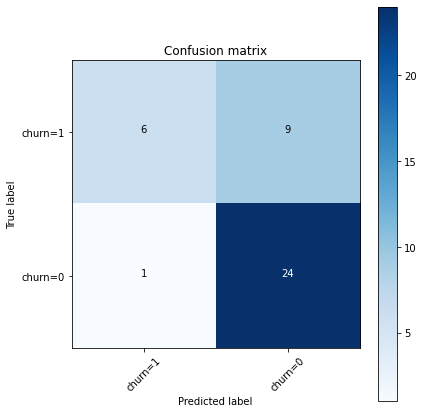

In [19]:
# Computation of Confusion Matrix and its plot
eval_3 = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plt.figure(figsize=(6, 6))
confusion_matrix_plot (eval_3, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [20]:
# Classification Report:
eval_3 = classification_report(y_test, y_hat)
print('Classification report:\n\n', eval_3)

Classification report:

               precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [21]:
# which solvers isww better on log loss metrics ?!

solvers_list = ['liblinear', 'lbfgs', 'saga', 'sag', 'newton-cg']
eval_list = list()

for i, solver in enumerate(solvers_list):
    print('solver is = ', solver)
    LR_model = LogisticRegression(C=0.01, solver=solver).fit(x_train, y_train)
    y_hat = LR_model.predict(x_test)
    eval_log_loss = log_loss(y_test, y_hat)
    eval_list.append(eval_log_loss)
    
print(eval_list)

solver is =  liblinear
solver is =  lbfgs
solver is =  saga
solver is =  sag
solver is =  newton-cg
[8.634714088663426, 12.952041148091507, 12.952041148091507, 12.952041148091507, 12.952041148091507]


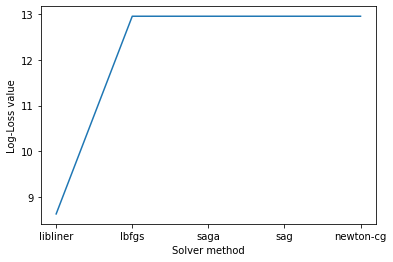

In [22]:
# plotting results:
x_ticks = ['libliner', 'lbfgs', 'saga', 'sag', 'newton-cg']
x =[1, 2, 3, 4, 5]
plt.xticks(x, x_ticks)
plt.plot(x, eval_list)
plt.xlabel('Solver method')
plt.ylabel('Log-Loss value')
plt.show()



